In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Model

In [3]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-11-24 06:48:57--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.81.48, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.02s   

2020-11-24 06:48:57 (20.1 MB/s) - ‘spam.csv’ saved [503663/503663]



In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [5]:
df['v1'] = df['v1'].map({'ham':0, 'spam':1})
print(df.head(),'\n')
print(df.tail())

   v1                                                 v2
0   0  Go until jurong point, crazy.. Available only ...
1   0                      Ok lar... Joking wif u oni...
2   1  Free entry in 2 a wkly comp to win FA Cup fina...
3   0  U dun say so early hor... U c already then say...
4   0  Nah I don't think he goes to usf, he lives aro... 

      v1                                                 v2
5567   1  This is the 2nd time we have tried 2 contact u...
5568   0              Will Ì_ b going to esplanade fr home?
5569   0  Pity, * was in mood for that. So...any other s...
5570   0  The guy did some bitching but I acted like i'd...
5571   0                         Rofl. Its true to its name


In [6]:
inputs = df['v2']
labels = df['v1'].to_numpy()

In [7]:
# Test, train split

index = int(0.67*len(inputs))
X_train, y_train, X_test, y_test = inputs.iloc[:index], labels[:index], inputs.iloc[index:], labels[index:]

In [8]:
# Applying tokenizer on X_train, X_test
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer (num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train)	

T = X_train.shape[1]
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = T)

In [9]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7254 unique tokens.


In [10]:
D = 20
K = 1
visible = Input(shape=(T,))
x = Embedding(V+1, D)(visible)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
output = Dense(K, activation='sigmoid')(x)

model = Model(inputs=visible, outputs=output)

In [11]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 189)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 189, 20)           145100    
_________________________________________________________________
conv1d (Conv1D)              (None, 187, 32)           1952      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 62, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 20, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 18, 128)          

In [12]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [13]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 5)

Epoch 1/5
117/117 [==============================] - 3s 23ms/step - loss: 0.3877 - accuracy: 0.8669 - val_loss: 0.2775 - val_accuracy: 0.8630
Epoch 2/5
117/117 [==============================] - 2s 21ms/step - loss: 0.1432 - accuracy: 0.9384 - val_loss: 0.0920 - val_accuracy: 0.9630
Epoch 3/5
117/117 [==============================] - 3s 21ms/step - loss: 0.0314 - accuracy: 0.9917 - val_loss: 0.1071 - val_accuracy: 0.9766
Epoch 4/5
117/117 [==============================] - 2s 21ms/step - loss: 0.0081 - accuracy: 0.9984 - val_loss: 0.0841 - val_accuracy: 0.9826
Epoch 5/5
117/117 [==============================] - 2s 21ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0868 - val_accuracy: 0.9831


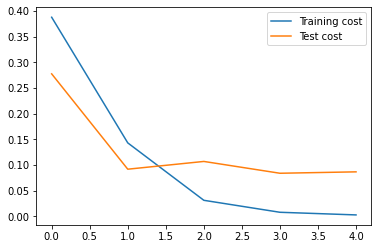

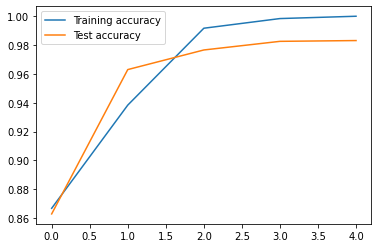

In [14]:
plt.plot(r.history['loss'], label='Training cost')
plt.plot(r.history['val_loss'], label='Test cost')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='Training accuracy')
plt.plot(r.history['val_accuracy'], label='Test accuracy')
plt.legend()
plt.show()